In [81]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

In [82]:
# look at the directories and files
dataset_path = "/kaggle/input/gtsrb-german-traffic-sign"
print(os.listdir(dataset_path))

['Meta', 'meta', 'Meta.csv', 'Train.csv', 'Test.csv', 'Test', 'test', 'Train', 'train']


In [83]:
train_df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv')
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [84]:
# preparation of original data

# Paths to data
base_path = "../input/gtsrb-german-traffic-sign/Train"

# Lists to store image paths and their corresponding class labels
image_paths = []
labels = []

# Collect image paths from class folders
for class_id in range(43):
    class_path = os.path.join(base_path, str(class_id))
    
    if os.path.exists(class_path):
        images = os.listdir(class_path)
        full_paths = [os.path.join(class_path, img) for img in images]
        image_paths.extend(full_paths)
        labels.extend([class_id] * len(images))

print(f"Total images: {len(image_paths)}")

# Image size
IMG_SIZE = (64, 64)

# Lists to store processed images and labels
original_images = []
original_labels = []

# Process each image
for img_path, label in zip(image_paths, labels):
    # Load the image in color (BGR format)
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Error loading: {img_path}")
        continue  # Skip if the file is corrupted
    
    # Resize the image
    img_resized = cv2.resize(img, IMG_SIZE)
    
    # Append to the lists
    original_images.append(img_resized)
    original_labels.append(label)

# Convert lists to numpy arrays
original_images = np.array(original_images, dtype=np.float32) / 255.0  # Normalize after conversion
original_labels = np.array(original_labels, dtype=np.int32)

# Print array shapes for verification
print(f"Shape of image array processed_images: {original_images.shape}")  # Expected: (num_images, 32, 32, 3)
print(f"Shape of label array processed_labels: {original_labels.shape}")  # Expected: (num_images,)


Total images: 39209
Shape of image array processed_images: (39209, 64, 64, 3)
Shape of label array processed_labels: (39209,)


In [85]:
# Test/Train
X = original_images
y = original_labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  one-hot encoding
y_train = to_categorical(y_train, num_classes=43)
y_val = to_categorical(y_val, num_classes=43)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_val.shape}")

Training data shape: (31367, 64, 64, 3)
Test data shape: (7842, 64, 64, 3)


CNN Model

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_127 (Conv2D)                  │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_82 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_128 (Conv2D)                  │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_83 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_30 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,650,027 (6.29 MB)

 Trainable params: 1,650,027 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5694 - loss: 1.6042 - val_accuracy: 0.9371 - val_loss: 0.2183
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9659 - loss: 0.1263 - val_accuracy: 0.9628 - val_loss: 0.1363
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9784 - loss: 0.0769 - val_accuracy: 0.9759 - val_loss: 0.1037
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9887 - loss: 0.0447 - val_accuracy: 0.9654 - val_loss: 0.1429
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9908 - loss: 0.0347 - val_accuracy: 0.9850 - val_loss: 0.0803
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9920 - loss: 0.0284 - val_accuracy: 0.9778 - val_loss: 0.1063
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9946 - loss: 0.0221 - val_accuracy: 0.9809 - val_loss: 0.1014
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9940 - loss: 0.0205 - val_accuracy: 0

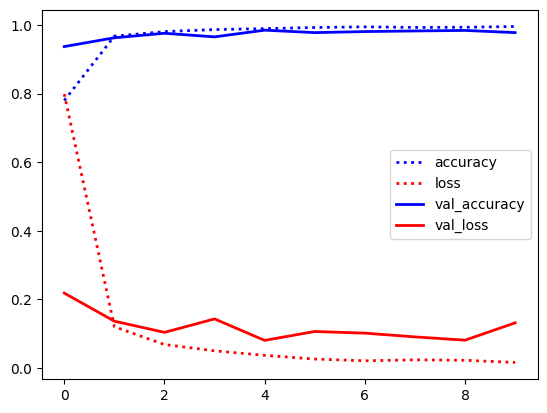

In [86]:
# CNN model_01 2 layers 

model_01 = models.Sequential()

model_01.add(layers.Input(shape=(64, 64, 3)))
model_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_01.add(layers.MaxPooling2D((2, 2)))

model_01.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_01.add(layers.MaxPooling2D((2, 2)))

model_01.add(layers.Flatten())
model_01.add(layers.Dense(128, activation='relu'))

model_01.add(layers.Dense(43, activation='softmax'))

model_01.summary()

# Compile the model
model_01.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_01 = model_01.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

pd.DataFrame(history_01.history).plot(lw=2,style=['b:','r:','b-','r-']);
print("Max val_acc",np.max(history_01.history['val_accuracy']))

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


y_pred = model_01.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Precision
precision = precision_score(y_true, y_pred_classes, average='weighted')  # weighted - взвешенная метрика
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9788406463339244
Recall: 0.9778117827084928
F1 Score: 0.977825950328017


In [88]:
# CNN_02 Model with 3 layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model_02 = Sequential()

# Première couche de convolution + MaxPooling
model_02.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model_02.add(MaxPooling2D(pool_size=(2, 2)))

# Deuxième couche de convolution + MaxPooling
model_02.add(Conv2D(32, (3, 3), activation='relu'))
model_02.add(MaxPooling2D(pool_size=(2, 2)))

# Troisième couche de convolution + MaxPooling
model_02.add(Conv2D(64, (3, 3), activation='relu'))
model_02.add(MaxPooling2D(pool_size=(2, 2)))

# Couche Flatten pour aplatir l'image
model_02.add(Flatten())

# Couche Dense (Fully Connected)
model_02.add(Dense(128, activation='relu'))

# Couche de sortie (43 classes car il y a 43 panneaux)
model_02.add(Dense(43, activation='softmax'))

# Compiler le modèle
model_02.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model_02.summary()

# Entraînement du modèle avec EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_02 = model_02.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


# Évaluation du modèle sur les données de validation
val_loss, val_accuracy = model_02.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_129 (Conv2D)                  │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_84 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_130 (Conv2D)                  │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_85 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_131 (Conv2D)                  │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_86 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_31 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329,227 (1.26 MB)

 Trainable params: 329,227 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4928 - loss: 1.8797 - val_accuracy: 0.9315 - val_loss: 0.2375
Epoch 2/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9646 - loss: 0.1330 - val_accuracy: 0.9799 - val_loss: 0.0914
Epoch 3/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9816 - loss: 0.0622 - val_accuracy: 0.9846 - val_loss: 0.0730
Epoch 4/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9907 - loss: 0.0332 - val_accuracy: 0.9865 - val_loss: 0.0664
Epoch 5/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9936 - loss: 0.0219 - val_accuracy: 0.9878 - val_loss: 0.0534
Epoch 6/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9938 - loss: 0.0236 - val_accuracy: 0.9893 - val_loss: 0.0567
Epoch 7/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.9727 - val_loss: 0.1321
Epoch 8/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9942 - loss: 0.0225 - val_accuracy: 0.

Max val_acc 0.9913287162780762


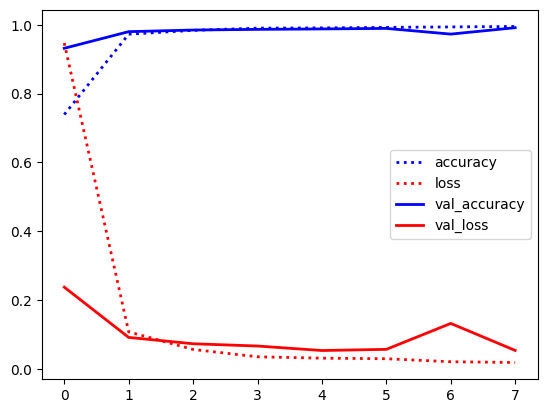

In [89]:
pd.DataFrame(history_02.history).plot(lw=2,style=['b:','r:','b-','r-']);
print("Max val_acc",np.max(history_02.history['val_accuracy']))

In [90]:
y_pred = model_02.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Precision
precision = precision_score(y_true, y_pred_classes, average='weighted')  # weighted - взвешенная метрика
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9879615711778145
Recall: 0.9877582249426167
F1 Score: 0.987750880819485


In [91]:
# CNN_03 model with 3 layers and Dropout

model = models.Sequential()

model.add(layers.Input(shape=(64, 64, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2)) 

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2)) 

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))  

model.add(layers.Dense(43, activation='softmax'))

model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_132 (Conv2D)                  │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_87 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_133 (Conv2D)                  │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_88 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_134 (Conv2D)                  │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_89 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 376,235 (1.44 MB)

 Trainable params: 376,235 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
# Train the model
history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.2930 - loss: 2.5555 - val_accuracy: 0.8046 - val_loss: 0.6472
Epoch 2/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7871 - loss: 0.6472 - val_accuracy: 0.9648 - val_loss: 0.1650
Epoch 3/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9022 - loss: 0.2981 - val_accuracy: 0.9815 - val_loss: 0.0825
Epoch 4/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9374 - loss: 0.1942 - val_accuracy: 0.9847 - val_loss: 0.0599
Epoch 5/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9539 - loss: 0.1418 - val_accuracy: 0.9912 - val_loss: 0.0376
Epoch 6/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9644 - loss: 0.1130 - val_accuracy: 0.9902 - val_loss: 0.0381
Epoch 7/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9681 - loss: 0.1059 - val_accuracy: 0.9931 - val_loss: 0.0349
Epoch 8/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9728 - loss: 0.0852 - val_accuracy: 

Max val_acc 0.9951543211936951


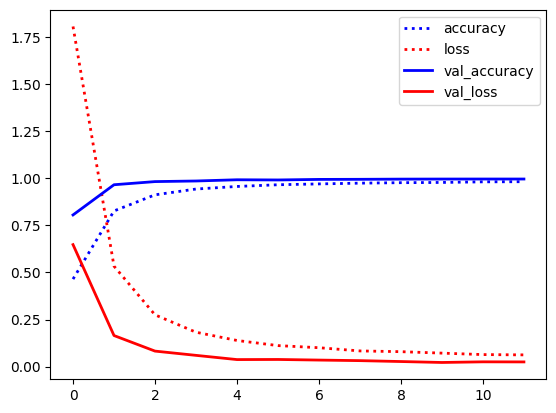

In [94]:
pd.DataFrame(history.history).plot(lw=2,style=['b:','r:','b-','r-']);
print("Max val_acc",np.max(history.history['val_accuracy']))

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Precision
precision = precision_score(y_true, y_pred_classes, average='weighted') 
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9951884020530026
Recall: 0.9951542973731191
F1 Score: 0.9951460931764744


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


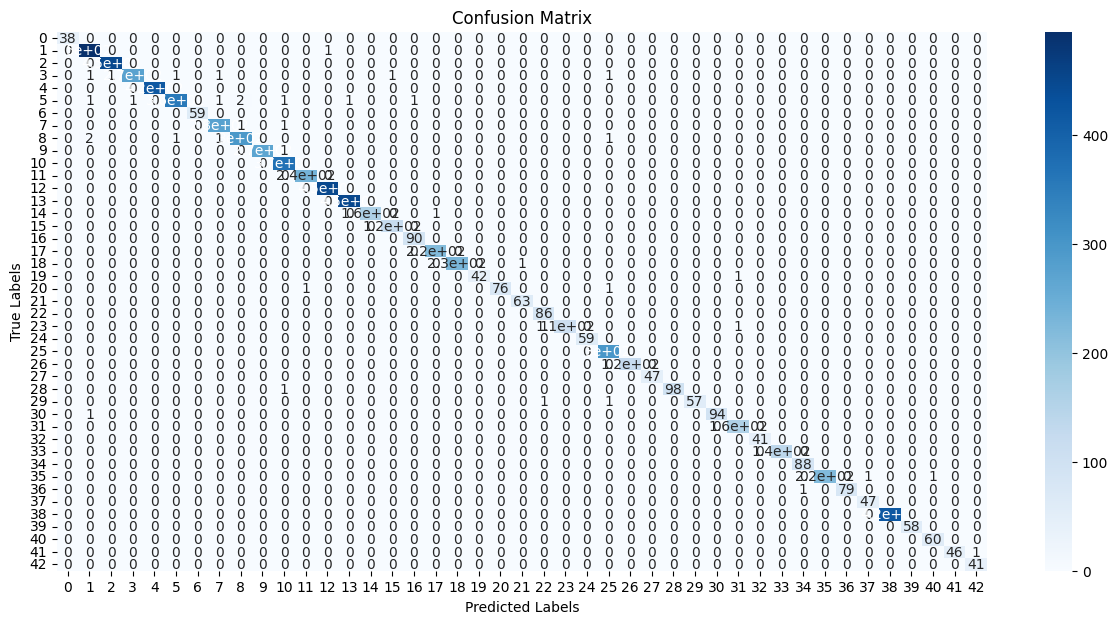

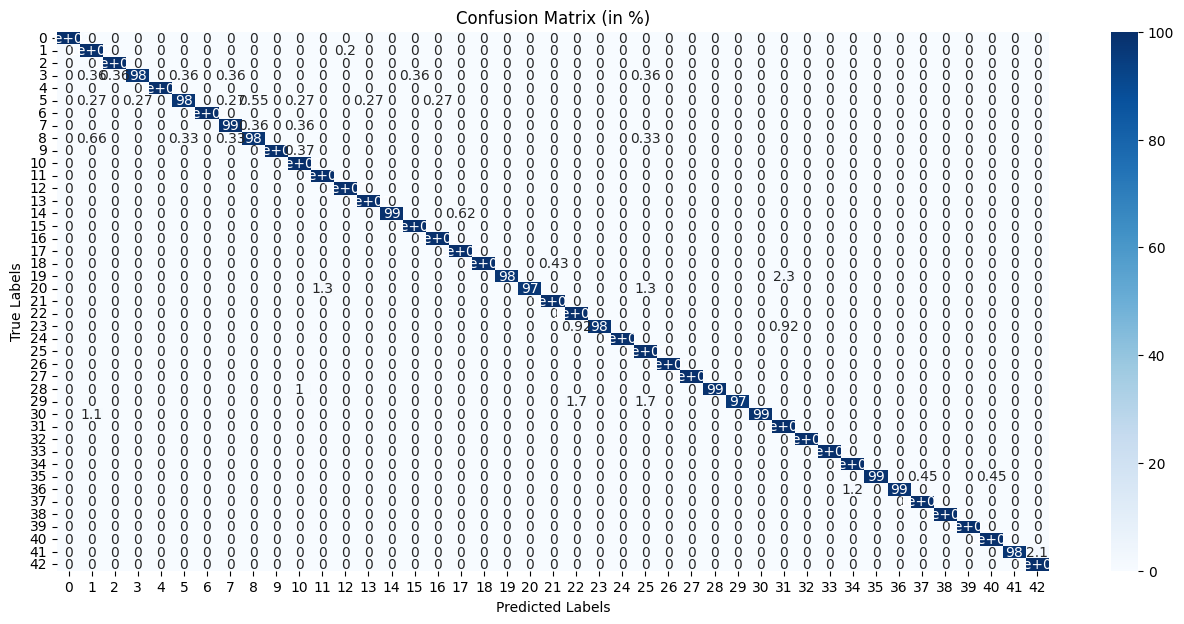

Accuracy: 0.9952


In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Predictions on the test dataset (e.g. X_test)
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)  # the test labels are one-hot encoded, use np.argmax to get class indices

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=np.arange(43), yticklabels=np.arange(43))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Normalize the confusion matrix by row (i.e., by the total number of actual instances in each class)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage

# Display the confusion matrix as a heatmap in percentage
plt.figure(figsize=(16, 7))
sns.heatmap(cm_percentage, annot=True, cmap='Blues', xticklabels=np.arange(43), yticklabels=np.arange(43))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (in %)')
plt.show()

# Display the accuracy (to check if errors are significant)
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')


In [97]:
# Modèle CNN en utilisant les techniques de régularisation

model_dbn = models.Sequential()

# Couche 1
model_dbn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'))
model_dbn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_dbn.add(layers.MaxPooling2D((2, 2)))
model_dbn.add(layers.BatchNormalization())  # Normalisation par lots

# Couche 2
model_dbn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_dbn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_dbn.add(layers.MaxPooling2D((2, 2)))
model_dbn.add(layers.BatchNormalization())  # Normalisation par lots

# Couche 3
model_dbn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_dbn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_dbn.add(layers.MaxPooling2D((2, 2)))
model_dbn.add(layers.BatchNormalization())  # Normalisation par lots

# Couche Finale
model_dbn.add(layers.Flatten())
model_dbn.add(layers.Dense(64, activation='relu'))
model_dbn.add(layers.Dropout(0.5))  # Ajout de Dropout avant la couche de sortie
model_dbn.add(layers.Dense(43, activation='softmax'))


model_dbn.summary()  # structure du modèle


model_dbn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrainement

history_dbn = model_dbn.fit( X_train, y_train, batch_size=32,
                     epochs=10,
                     validation_data=(X_val, y_val))





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_135 (Conv2D)                  │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_136 (Conv2D)                  │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_90 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_137 (Conv2D)                  │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_138 (Conv2D)                  │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_91 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_139 (Conv2D)                  │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_140 (Conv2D)                  │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_92 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_33 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 43)                  │           2,795 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 815,051 (3.11 MB)

 Trainable params: 814,603 (3.11 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.2369 - loss: 2.9080 - val_accuracy: 0.8305 - val_loss: 0.5379
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8422 - loss: 0.4993 - val_accuracy: 0.9821 - val_loss: 0.0640
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9571 - loss: 0.1339 - val_accuracy: 0.9890 - val_loss: 0.0449
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9697 - loss: 0.0933 - val_accuracy: 0.9920 - val_loss: 0.0344
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9756 - loss: 0.0772 - val_accuracy: 0.9949 - val_loss: 0.0242
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9805 - loss: 0.0626 - val_accuracy: 0.9941 - val_loss: 0.0273
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9795 - loss: 0.0692 - val_accuracy: 0.9918 - val_loss: 0.0335
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9855 - loss: 0.0470 - 

Max val_acc 0.9961744546890259


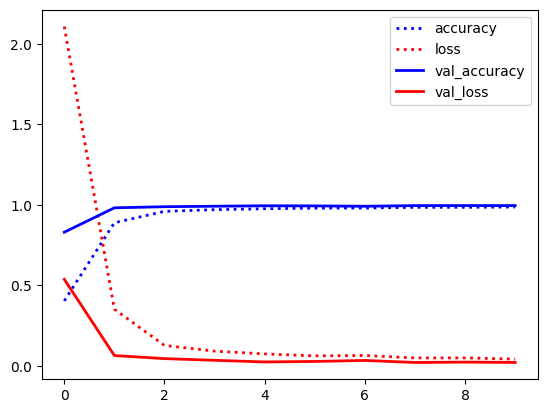

In [98]:
pd.DataFrame(history_dbn.history).plot(lw=2,style=['b:','r:','b-','r-']);
print("Max val_acc",np.max(history_dbn.history['val_accuracy']))

In [99]:
y_pred = model_dbn.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Precision
precision = precision_score(y_true, y_pred_classes, average='weighted')  # weighted - взвешенная метрика
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Precision: 0.9960996731617822
Recall: 0.9960469268043867
F1 Score: 0.9960505392089232


## 3.VGG-like Model

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_147 (Conv2D)                  │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_148 (Conv2D)                  │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_96 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_149 (Conv2D)                  │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_150 (Conv2D)                  │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_97 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_151 (Conv2D)                  │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_152 (Conv2D)                  │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_98 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_35 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,341,259 (5.12 MB)

 Trainable params: 1,341,259 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.4632 - loss: 1.9853 - val_accuracy: 0.9654 - val_loss: 0.1218
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9756 - loss: 0.0847 - val_accuracy: 0.9833 - val_loss: 0.0650
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9898 - loss: 0.0366 - val_accuracy: 0.9881 - val_loss: 0.0533
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9880 - loss: 0.0413 - val_accuracy: 0.9931 - val_loss: 0.0297
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9951 - loss: 0.0161 - val_accuracy: 0.9787 - val_loss: 0.0668
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9940 - loss: 0.0214 - val_accuracy: 0.9911 - val_loss: 0.0377
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9953 - loss: 0.0168 - val_accuracy: 0.9758 - val_loss: 0.0951
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9928 - loss: 0.0260 - 

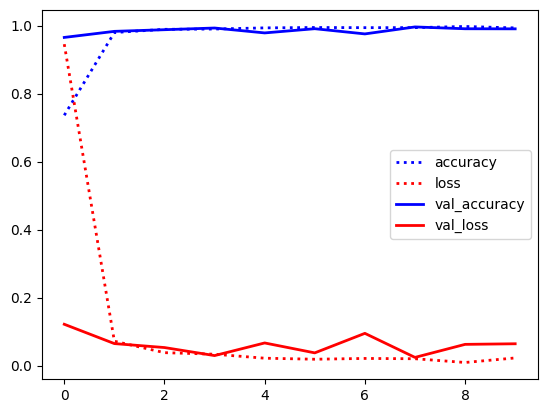

In [101]:
model_vgg_1 = models.Sequential()
model_vgg_1.add(layers.Input(shape=(64, 64, 3)))
model_vgg_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_vgg_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_vgg_1.add(layers.MaxPooling2D((2, 2)))
model_vgg_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg_1.add(layers.MaxPooling2D((2, 2)))
model_vgg_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg_1.add(layers.MaxPooling2D((2, 2)))
model_vgg_1.add(layers.Flatten())
model_vgg_1.add(layers.Dense(128, activation='relu'))
model_vgg_1.add(layers.Dense(43, activation='softmax'))

model_vgg_1.summary()

model_vgg_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
history_vgg_1 = model_vgg_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
pd.DataFrame(history_vgg_1.history).plot(lw=2,style=['b:','r:','b-','r-']);
print("Max val_acc",np.max(history_vgg_1.history['val_accuracy']))

In [102]:
y_pred = model_vgg_1.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Precision
precision = precision_score(y_true, y_pred_classes, average='weighted')  # weighted - взвешенная метрика
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Precision: 0.9908752522100563
Recall: 0.9906911502167814
F1 Score: 0.9906917195433268
